# **Exploratory Data Analysis (EDA) of Stock Market Data**


### **Things Covered in EDA**
1. Load the Processed Data
2. Understand Data Structure (info, summary, missing values)
3. Univariate Analysis (distribution of stock prices, volume)
4. Bivariate Analysis (correlation between features)
5. Time-Series Analysis (trend, seasonality, moving averages)
6. Visualizations:
    - Stock price trends over time (Line plot).
    - Daily returns distribution (Histogram).
    - Moving Averages (SMA, EMA) (Trend analysis).
    - Volume Analysis (Bar chart).
    - Correlation between Open, High, Low, Close (Heatmap).

## **Step-1: Load & Inspect Data**

In [407]:
# Download the required libraries
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [408]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
# Define stock symbol (Modify for dynamic input if needed)
stock = "^NSEI"

In [410]:
# Load processed data:
processed_file = f'processed_{stock.replace("^", "").replace(".", "_")}_data.csv'

processed_path = os.path.abspath(os.path.join("..","data", processed_file))

print(f"📂 Loading file from: {processed_path}")

📂 Loading file from: c:\Users\lenovo\Desktop\Data-Scientist\Projects\5-Real-Time-Stock-Market-Analysis\data\processed_NSEI_data.csv


In [411]:
# Read File:
if os.path.exists(processed_path):
    df = pd.read_csv(processed_path)
    print("✅ File loaded successfully!")
    print(df.head())
else:
    print("❌ File not found! Run preprocess_data.py first.")

# Show Top 5 rows of data:
print("Top 5 rows if CSV file: \n")

✅ File loaded successfully!
         Date  Closing_Price          High           Low          Open  \
0  2023-01-02   18197.449219  18215.150391  18086.500000  18131.699219   
1  2023-01-03   18232.550781  18251.949219  18149.800781  18163.199219   
2  2023-01-04   18042.949219  18243.000000  18020.599609  18230.650391   
3  2023-01-05   17992.150391  18120.300781  17892.599609  18101.949219   
4  2023-01-06   17859.449219  18047.400391  17795.550781  18008.050781   

     Volume  
0  256100.0  
1  208700.0  
2  235200.0  
3  269900.0  
4  238200.0  
Top 5 rows if CSV file: 



## **Step-2: Summary Statistics**

In [412]:
# Display basic info
print("Display basic info: \n")
df.info()

Display basic info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           245 non-null    object 
 1   Closing_Price  245 non-null    float64
 2   High           245 non-null    float64
 3   Low            245 non-null    float64
 4   Open           245 non-null    float64
 5   Volume         245 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.6+ KB


In [413]:
# Summary of Statistics of Numerical Columns
df.describe()

,Closing_Price,High,Low,Open,Volume
count,245.000000,245.000000,245.000000,245.000000,245.000000
mean,18900.591271,18971.875861,18819.878516,18909.807350,263406.530612
std,1109.036568,1098.681921,1108.015486,1096.703771,76291.362056
min,16945.050781,17061.750000,16828.349609,16977.300781,0.000000
25%,17915.050781,18034.250000,17846.150391,17950.400391,222500.000000
50%,18989.150391,19076.150391,18926.650391,19027.250000,249800.000000
75%,19664.699219,19726.250000,19563.099609,19651.400391,282700.000000
max,21778.699219,21801.449219,21678.000000,21737.650391,696500.000000


In [414]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Date             0
Closing_Price    0
High             0
Low              0
Open             0
Volume           0
dtype: int64


#### **Observations:**
1. df.describe() gives key statistical metrics (mean, min, max, standard deviation, etc.).
2. Missing values (df.isnull().sum()) are zero, so dataset is clean.


#### **Conclusions:**
1. `Closing_Price` has a high standard deviation, it means the stock price fluctuates a lot (high volatility).
2. `Volume` has big jumps, some days have a lot more trading activity than others.

#### **📌 Key Takeaway:**
1. If the standard deviation of stock price is high, it's a volatile stock.
2. If the volume fluctuates a lot, certain days have more market interest.

## **Step 3: Stock Price Trends Over Time**

**What It Means:**

We plot the stock's closing price over time to identify trends (upward, downward, or sideways).

In [415]:
# If the 'Date' column exists, convert and set it as index; otherwise, convert the existing index to datetime
# if 'Date' in df.columns:
# 	df['Date'] = pd.to_datetime(df['Date'])
# 	df.set_index('Date', inplace=True)
# 	pass
# else:
# 	df.index = pd.to_datetime(df.index)

df['Date'] = pd.to_datetime(df['Date'])

print(df.head())

        Date  Closing_Price          High           Low          Open  \
0 2023-01-02   18197.449219  18215.150391  18086.500000  18131.699219   
1 2023-01-03   18232.550781  18251.949219  18149.800781  18163.199219   
2 2023-01-04   18042.949219  18243.000000  18020.599609  18230.650391   
3 2023-01-05   17992.150391  18120.300781  17892.599609  18101.949219   
4 2023-01-06   17859.449219  18047.400391  17795.550781  18008.050781   

     Volume  
0  256100.0  
1  208700.0  
2  235200.0  
3  269900.0  
4  238200.0  


**How to Do It:**

Use a line chart with:
- X-axis: Date
- Y-axis: Closing Price

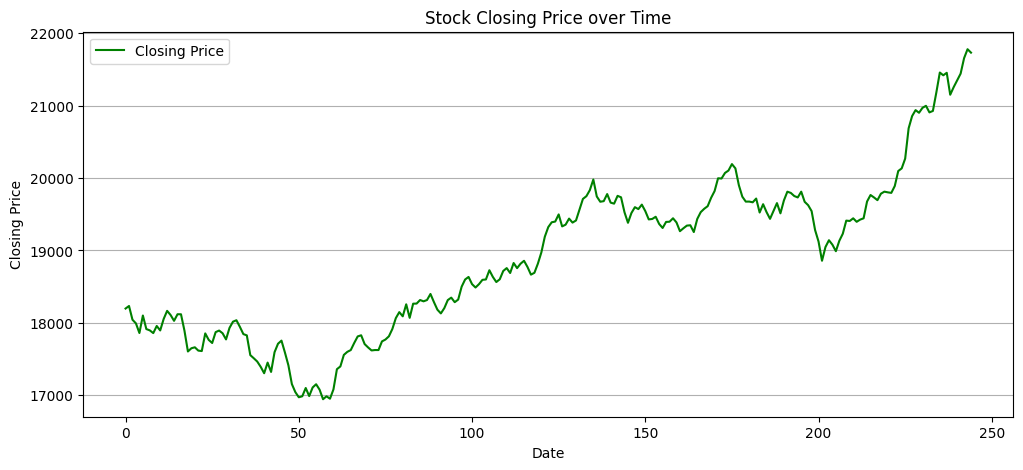

In [416]:
# Plot the closing price
plt.figure(figsize=(12,5))
plt.plot(df['Closing_Price'], label="Closing Price", color='green')

plt.title("Stock Closing Price over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(axis='y')
plt.show()

## **Step 4: Daily Returns Distribution**

**What It Means:**
- Daily return tells us how much the stock price changed compared to the previous day closing price.
- It helps analyze volatility (risk).
- It helps us see gains or losses for each day.

$\text{Daily Return} = \left( \frac{\text{Today's Closing Price} - \text{Yesterday's Closing Price}}{\text{Yesterday's Closing Price}} \right) \times 100$


In [417]:
# Calculate daily returns using numpy shift
# Using df[].shift(1) moves all values down by one row
df['Daily_return'] = ((df['Closing_Price'] - df['Closing_Price'].shift(1)) / df['Closing_Price'].shift(1)) * 100

df.head()

,Date,Closing_Price,High,Low,Open,Volume,Daily_return
0,2023-01-02,18197.449219,18215.150391,18086.500000,18131.699219,256100.0,NaN
1,2023-01-03,18232.550781,18251.949219,18149.800781,18163.199219,208700.0,0.192893
2,2023-01-04,18042.949219,18243.000000,18020.599609,18230.650391,235200.0,-1.039907
3,2023-01-05,17992.150391,18120.300781,17892.599609,18101.949219,269900.0,-0.281544
4,2023-01-06,17859.449219,18047.400391,17795.550781,18008.050781,238200.0,-0.737550


In [418]:
# using pct_change()
df['Daily_Return'] = df ['Closing_Price'].pct_change() * 100
df.head()

,Date,Closing_Price,High,Low,Open,Volume,Daily_return,Daily_Return
0,2023-01-02,18197.449219,18215.150391,18086.500000,18131.699219,256100.0,NaN,NaN
1,2023-01-03,18232.550781,18251.949219,18149.800781,18163.199219,208700.0,0.192893,0.192893
2,2023-01-04,18042.949219,18243.000000,18020.599609,18230.650391,235200.0,-1.039907,-1.039907
3,2023-01-05,17992.150391,18120.300781,17892.599609,18101.949219,269900.0,-0.281544,-0.281544
4,2023-01-06,17859.449219,18047.400391,17795.550781,18008.050781,238200.0,-0.737550,-0.737550


**How to Analyze:**
- Plot a histogram to see how returns are distributed.
- A wider spread means higher volatility.

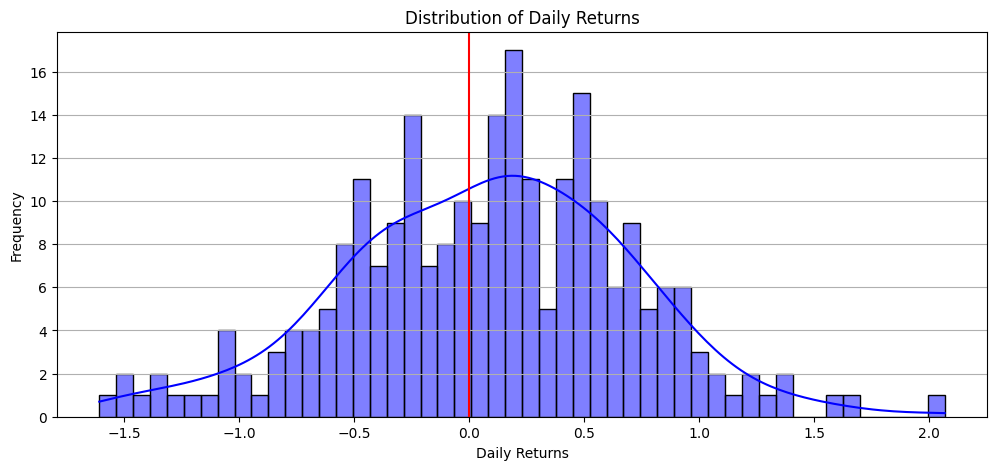

In [419]:
# Plotting the histogram:
plt.figure(figsize=(12,5))
sns.histplot(data=df['Daily_Return'].dropna(), bins=50, kde=True, color='blue')

plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red')
plt.grid(axis='y')
plt.show()

#### **Observations:**

**1. Histogram Width (Volatility Check):**
- The histogram is **widely spread**, indicating **high volatility** in stock return.
- This suggests that **daily price changes are significant**, meaning traders and investors should expect frequent fluctuations.

**2. Centering of Returns (Stock Stability):**
- **The peak is slightly shifted to the right (between 0 - 0.5%), meaning the stock tends to have small positive daily returns on average.**
- This is a good sign, as it indicates that the stock is generally growing rather than declining over time.
 
**3. Negative vs. Positive Returns:**
- The left side (negative returns) has fewer bars than the right side (positive returns).
- This suggests that there are more positive return days than negative return days, implying a bullish trend over the dataset period.

**4. Extreme Bars on Both Sides (Risk Analysis):**

- There are more extreme positive returns (higher bars on the right side) compared to extreme negative returns.
- This means that while the stock is volatile, it has a tendency to provide higher positive gains rather than major losses.


#### **Conclusions:**
- High Volatility: The stock has significant price fluctuations, meaning it carries both risk and reward. Short-term traders may benefit from price swings.
- Positive Skewness: Since the majority of returns are positive, investors generally make money over time.
- Not a Stable Stock: The peak is slightly right-shifted, indicating it’s not purely stable but tends to favor gains more than losses.
- Potential for Good Returns: Since the right side (positive gains) has more extreme values than the left (losses), the stock has better upside potential than downside risk.


#### **📌 Key Takeaway:**

This stock is volatile but has a positive bias, meaning it may be a good investment for those who can handle short-term price swings. Long-term investors may benefit from the overall upward trend, but short-term traders should be cautious of sudden drops.

## **Step 5: Moving Averages (SMA & EMA)**

**What It Means:**
- Moving Averages smooth out stock price fluctuations to identify trends.

There are two main types:

1. **Simple Moving Average (SMA) –** Gives equal importance to all prices in the chosen period.
2. **Exponential Moving Average (EMA) –** Gives more importance to recent prices, making it more responsive to changes.

##### **Formulas:**

> **SMA *(Simple Moving Average)***: 

Average price over a fixed period.

$$
SMA_{N} = \frac{Sum of Closing Prices over N days}{N}
$$

- N is the number of days (e.g., 5-day SMA, 20-day SMA).
- It smooths out price movements but is slow to react to recent changes.


> ***SMA (for 50 days)***

$$
SMA_{50} = \frac{\sum P_t}{50}
$$

where $$\ P_t$$ is the closing price of each day.

In [420]:
# Calculate Simple Moving Average (SMA):
df['SMA_50'] = df['Closing_Price'].rolling(window=50).mean()

# .rolling(window=50).mean() takes the average of the last 50 values.

In [421]:
print(df.head())
print("/n")
print(df.tail())

        Date  Closing_Price          High           Low          Open  \
0 2023-01-02   18197.449219  18215.150391  18086.500000  18131.699219   
1 2023-01-03   18232.550781  18251.949219  18149.800781  18163.199219   
2 2023-01-04   18042.949219  18243.000000  18020.599609  18230.650391   
3 2023-01-05   17992.150391  18120.300781  17892.599609  18101.949219   
4 2023-01-06   17859.449219  18047.400391  17795.550781  18008.050781   

     Volume  Daily_return  Daily_Return  SMA_50  
0  256100.0           NaN           NaN     NaN  
1  208700.0      0.192893      0.192893     NaN  
2  235200.0     -1.039907     -1.039907     NaN  
3  269900.0     -0.281544     -0.281544     NaN  
4  238200.0     -0.737550     -0.737550     NaN  
/n
          Date  Closing_Price          High           Low          Open  \
240 2023-12-22   21349.400391  21390.500000  21232.449219  21295.849609   
241 2023-12-26   21441.349609  21477.150391  21329.449219  21365.199219   
242 2023-12-27   21654.750000  21

> **EMA *(Exponential Moving Average)*:** 

Similar to SMA but gives more weight to recent prices (faster response to price changes).

> ***Formula:***

$$
EMA = (Today's Price \times \alpha) + (Yesterday's Price \times (1 - \alpha))
$$
Where:
- 𝛼 is a smoothing factor 
$$
\alpha = \frac{2}{N+1}
$$
- Recent prices have higher weight, making EMA respond faster to trends.

> **EMA for 50 Days**

$$
EMA_t = \alpha \times P_t + (1 - \alpha) \times EMA_{t-1}
$$

In [422]:
# Calculate Exponential Moving Average (EMA)
df['EMA_50'] = df['Closing_Price'].ewm(span=50, adjust=False).mean()

# .ewm(span=3, adjust=False).mean()

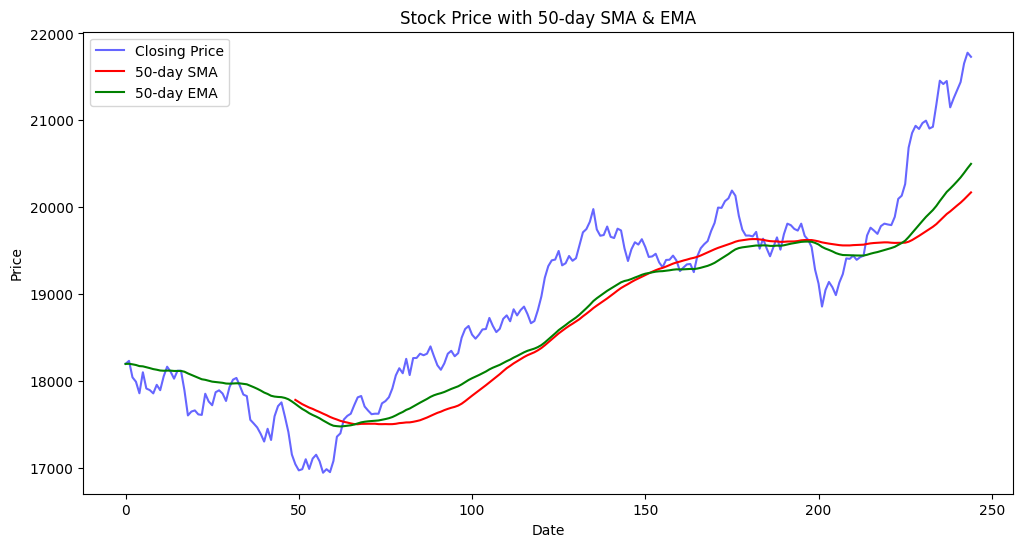

In [423]:
# Plot Closing Price with SMA & EMA
plt.figure(figsize=(12,6))
plt.plot(df['Closing_Price'], label="Closing Price", color="blue", alpha=0.6)
plt.plot(df['SMA_50'], label="50-day SMA", color="red")
plt.plot(df['EMA_50'], label="50-day EMA", color="green")
plt.title("Stock Price with 50-day SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#### **Observations:**
1. **Most of the time, yes.** This suggests that the stock is in an **uptrend**, meaning buyers are in control.

2. **At certain times, yes.** This happened early in the year (**January - March 2023**) and briefly in **November 2023**, indicating short-term downtrends.

3. **The Closing Price Cross Above the EMA? (Bullish Signal 📈):**  
- **Yes, multiple times.**  
- Around **April 2023**, the price moved above the EMA, confirming the start of an uptrend.  
- When the price crosses **above the EMA**, it signals **potential buying opportunities** since the trend might continue upward.

4. **The Closing Price Drop Below the EMA? (Bearish Signal 📉):**  
- **Yes, some instances.**  
- Around **March 2023** and **November 2023**, the price dropped below the EMA, which signals **potential selling pressure** and a possible downtrend.  
- When the price crosses **below the EMA**, it can indicate **a possible downtrend or correction**, meaning it might be time to sell or wait before buying.


#### **Conclusions:**
- **Uptrend Confirmed:** The 50-day SMA & EMA are rising, showing the stock has long-term strength.  
- **Buy Signals:** When the price **crosses above the EMA**, it often signals a buying opportunity.  
- **Sell Signals:** When the price **drops below the EMA**, it might signal a potential downtrend.  
- **EMA vs. SMA Sensitivity:** The **EMA reacts faster** to price changes than the SMA, making it useful for **short-term traders**.  


#### **📌 Key Takeaways:**  
- **If price > EMA → Bullish (Buy signal) ✅**  
- **If price < EMA → Bearish (Sell signal) ❌**  
- **SMA & EMA help confirm trends and predict price movements.**

## **Step 6: Volume Analysis**

**What It Means:**
- Volume shows how many shares were traded.
- High volume often confirms trends (e.g., a price rise with high volume is stronger).
- Spikes in volume often occur before major price movements.

**Bar chart:**
- The X-axis (horizontal) is Date.
- The Y-axis (vertical) is Trading Volume.
- The bars are purple with alpha=0.6 (which makes them slightly transparent).

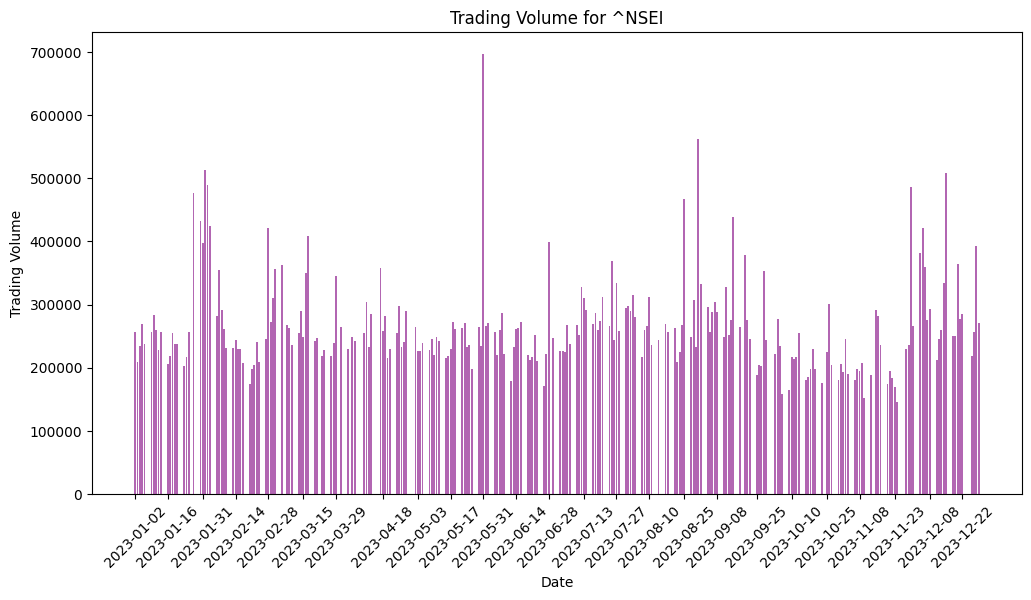

In [424]:
# Plotting Histogram
plt.figure(figsize=(12,6))
plt.bar(df['Date'], df['Volume'], color='purple', alpha=0.6)
# plt.plot(df['Closing_Price'], label="Closing Price", color="blue", alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title(f'Trading Volume for {stock}')
# plt.xticks(rotation=45)
plt.xticks(df['Date'][::10], rotation=45)  # Show every 10th date
plt.show()

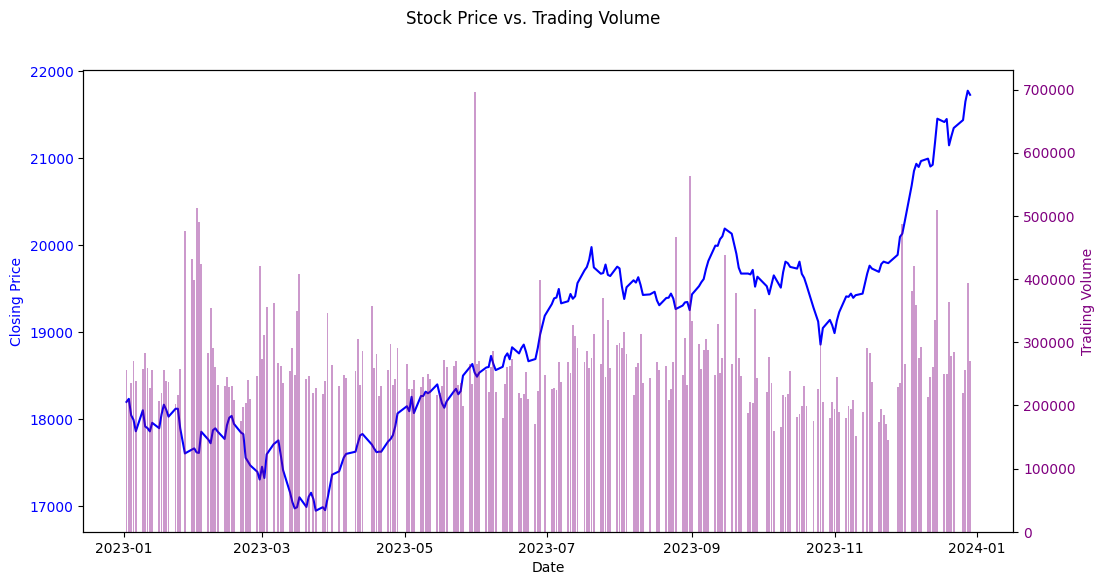

In [433]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Closing Price (Left Y-axis)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='b')
ax1.plot(df['Date'], df['Closing_Price'], color='b', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='b')




# Create second Y-axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Trading Volume', color='purple')
ax2.bar(df['Date'], df['Volume'], color='purple', alpha=0.4, label='Trading Volume')
ax2.tick_params(axis='y', labelcolor='purple')

fig.suptitle("Stock Price vs. Trading Volume")
plt.show()


In [426]:
df

,Date,Closing_Price,High,Low,Open,Volume,Daily_return,Daily_Return,SMA_50,EMA_50
0,2023-01-02,18197.449219,18215.150391,18086.500000,18131.699219,256100.0,NaN,NaN,NaN,18197.449219
1,2023-01-03,18232.550781,18251.949219,18149.800781,18163.199219,208700.0,0.192893,0.192893,NaN,18198.825751
2,2023-01-04,18042.949219,18243.000000,18020.599609,18230.650391,235200.0,-1.039907,-1.039907,NaN,18192.712945
3,2023-01-05,17992.150391,18120.300781,17892.599609,18101.949219,269900.0,-0.281544,-0.281544,NaN,18184.847747
4,2023-01-06,17859.449219,18047.400391,17795.550781,18008.050781,238200.0,-0.737550,-0.737550,NaN,18172.087021
...,...,...,...,...,...,...,...,...,...,...
240,2023-12-22,21349.400391,21390.500000,21232.449219,21295.849609,284700.0,0.443893,0.443893,20020.751992,20298.888492
241,2023-12-26,21441.349609,21477.150391,21329.449219,21365.199219,219500.0,0.430688,0.430688,20053.351992,20343.690888
242,2023-12-27,21654.750000,21675.750000,21495.800781,21497.650391,256500.0,0.995275,0.995275,20090.566992,20395.104971
243,2023-12-28,21778.699219,21801.449219,21678.000000,21715.000000,393100.0,0.572388,0.572388,20131.119961,20449.363569


#### **📊 Observations (Stock Price vs. Trading Volume)**  

1. **Volume Spikes on Certain Dates:**  
   - There are several spikes in trading volume, indicating high activity on certain days.  
   - Example: **Mid-2023 and Late-2023** have noticeable volume spikes.  

2. **Price Increase with High Volume (Strong Demand)**  
   - Around **mid-2023 & late-2023**, the stock price shows an **uptrend** while volume is also increasing.  
   - This suggests **strong buying interest**, meaning the price rise is backed by demand.  

3. **Price Drop with High Volume (Panic Selling)**  
   - Around **early 2023**, there is a **price decline along with high volume**.  
   - This signals **panic selling**, where many traders sell off their stocks, pushing the price down.  

4. **Price Moves with Low Volume**  
   - Some price movements (both up and down) occur on **low volume days**, indicating weak market conviction.  
   - If price moves up with **low volume**, it may not sustain the uptrend.  


#### **Conclusions:**  

- **High trading volume confirms strong price trends.**  
- **A rise in price with high volume is a bullish signal (strong demand).**  
- **A price drop with high volume is a bearish signal (panic selling).**  
- **If price rises on low volume, the uptrend might not be sustainable.**  
- **If price falls on low volume, it may indicate temporary weakness rather than a strong downtrend.**  

## **Step 7: Correlation Heatmap**

A **correlation heatmap** shows the relationship between different numerical variables.

- Correlation values range from -1 to 1:
    - 1 → Perfect positive correlation (variables move together).
    - 0 → No correlation (variables are independent).
    - -1 → Perfect negative correlation (variables move oppositely).

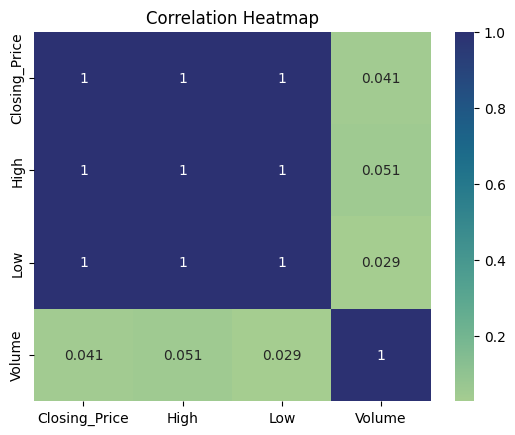

In [427]:
# Plot the correlation heatmap:
plt.Figure(figsize=(12,6))
sns.heatmap(data=df[['Closing_Price', 'High', 'Low', 'Volume']].corr(), annot=True, cmap='crest')

plt.title("Correlation Heatmap")
plt.show()

#### **📌 Observations from the Correlation Heatmap**
1. Stock prices (Closing, High, Low) are perfectly correlated (1.0)

    - This is logical because these values are derived from the same price movements.
2. Volume has a very weak correlation with price (~0.04 - 0.05)

    - This means that trading volume does not strongly impact stock price changes.
    - Even on high-volume days, price movements are not significantly influenced.

#### **📌 Conclusions from the Heatmap**
- Stock price movements are highly interdependent (Closing, High, and Low move together).
- Trading volume has almost no direct influence on stock price in this dataset.
- Other factors (like news, market trends, or economic events) might be driving price changes more than trading volume alone.

## **Moving Average (Trend Smoothing)**

Stock prices can be noisy, so let's plot a 7-day moving average to smoothen short-term fluctuations.

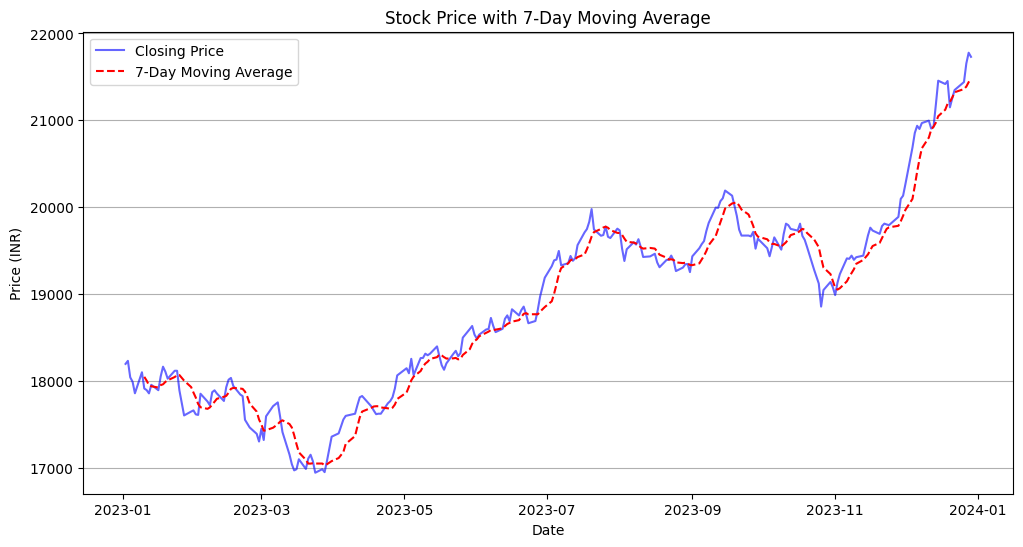

In [430]:
df['7-day MA'] = df['Closing_Price'].rolling(window=7).mean()

# Plot the Closing Price with Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing_Price'], label="Closing Price", color="blue", alpha=0.6)
plt.plot(df['Date'], df['7-day MA'], label="7-Day Moving Average", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.title("Stock Price with 7-Day Moving Average")
plt.legend()
plt.grid(axis='y')
plt.show()

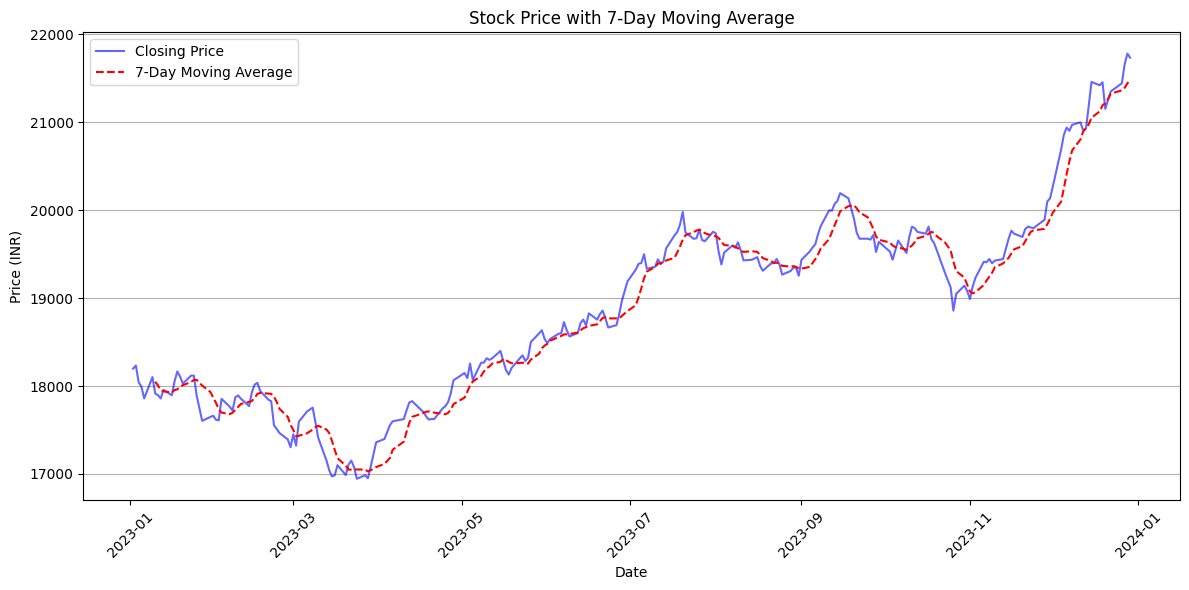

In [429]:
# Convert Date to datetime if not already
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing_Price'], label="Closing Price", color="blue", alpha=0.6)
plt.plot(df['Date'], df['7-day MA'], label="7-Day Moving Average", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.title("Stock Price with 7-Day Moving Average")
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()